# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset diperoleh dari Kaggle.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas. ✅
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.✅
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**. ✅
     - *Kategorikal*: Semua kecuali age. ✅
     - *Numerikal*: Age. ✅
3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan. ✅

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from google.colab import drive
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
from google.colab import files

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
data = pd.read_csv('/content/Bullying.csv', delimiter = ';')
data.head()

,record,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. Struktur Data

- Jumlah baris dan kolom dalam dataset.

In [ ]:
print('Jumlah baris dan kolom:', data.shape)

Jumlah baris dan kolom: (56981, 15)


- Jenis data di setiap kolom

In [ ]:
data.drop(columns=["record", 'Most_of_the_time_or_always_felt_lonely'], inplace=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Custom_Age                                   56981 non-null  object
 1   Sex                                          56981 non-null  object
 2   Physically_attacked                          56981 non-null  object
 3   Physical_fighting                            56981 non-null  object
 4   Felt_lonely                                  56981 non-null  object
 5   Close_friends                                56981 non-null  object
 6   Miss_school_no_permission                    56981 non-null  object
 7   Other_students_kind_and_helpful              56981 non-null  object
 8   Parents_understand_problems                  56981 non-null  object
 9   Missed_classes_or_school_without_permission  56981 non-null  object
 10  Were_under

,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,,,
1,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,,,
2,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No
3,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No
4,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,,,


## 2. Data hilang

- Identifikasi jumlah missing values di setiap kolom

In [ ]:
data = data.apply(lambda x: x.map(lambda val: np.nan if isinstance(val, str) and val.strip() == '' else val) if x.dtype == "object" else x)
print('Jumlah missing values tiap kolom:\n', data.isnull().sum())

Jumlah missing values tiap kolom:
 Custom_Age                                       108
Sex                                              536
Physically_attacked                              240
Physical_fighting                                268
Felt_lonely                                      366
Close_friends                                   1076
Miss_school_no_permission                       1864
Other_students_kind_and_helpful                 1559
Parents_understand_problems                     2373
Missed_classes_or_school_without_permission     1864
Were_underweight                               20929
Were_overweight                                20929
Were_obese                                     20929
dtype: int64


In [ ]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_data = pd.DataFrame({"Missing Values": data.isnull().sum(), "% Missing": missing_percentage})
print(missing_data[missing_data["Missing Values"] > 0].sort_values("% Missing", ascending=False))


                                             Missing Values  % Missing
Were_overweight                                       20929  36.729787
Were_obese                                            20929  36.729787
Were_underweight                                      20929  36.729787
Parents_understand_problems                            2373   4.164546
Miss_school_no_permission                              1864   3.271266
Missed_classes_or_school_without_permission            1864   3.271266
Other_students_kind_and_helpful                        1559   2.736000
Close_friends                                          1076   1.888349
Sex                                                     536   0.940664
Felt_lonely                                             366   0.642319
Physical_fighting                                       268   0.470332
Physically_attacked                                     240   0.421193
Custom_Age                                              108   0.189537


## 3. Analisis Distribusi dan Korelasi

- Stat des variabel numerik

In [ ]:
print('Statistik deskriptif:\n', data.describe())

Statistik deskriptif:
           Custom_Age     Sex Physically_attacked Physical_fighting  \
count          56873   56445               56741             56713   
unique             8       2                   8                 8   
top     14 years old  Female             0 times           0 times   
freq           12946   29362               46997             43246   

       Felt_lonely Close_friends Miss_school_no_permission  \
count        56615         55905                     55117   
unique           5             4                         5   
top          Never     3 or more                    0 days   
freq         17931         38731                     38654   

       Other_students_kind_and_helpful Parents_understand_problems  \
count                            55422                       54608   
unique                               5                           5   
top                   Most of the time                      Always   
freq                             15

## 4. Visualisasi Data

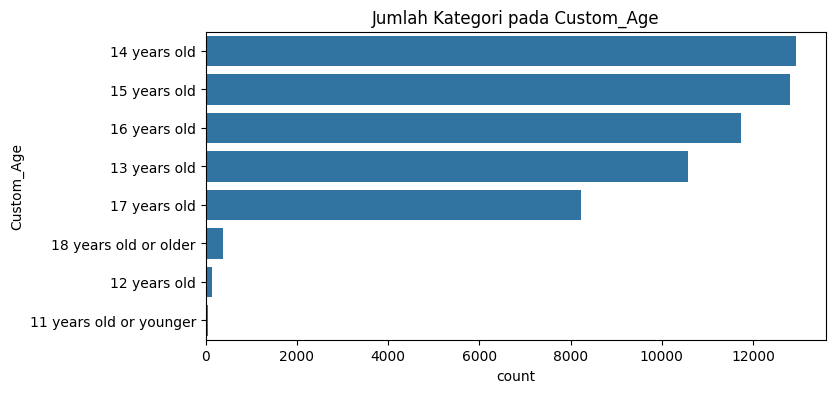

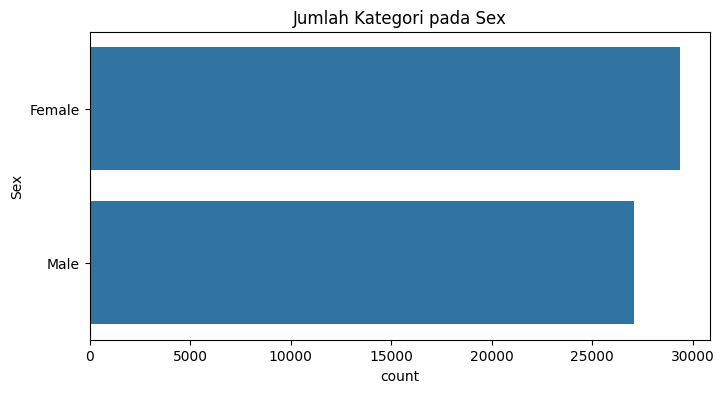

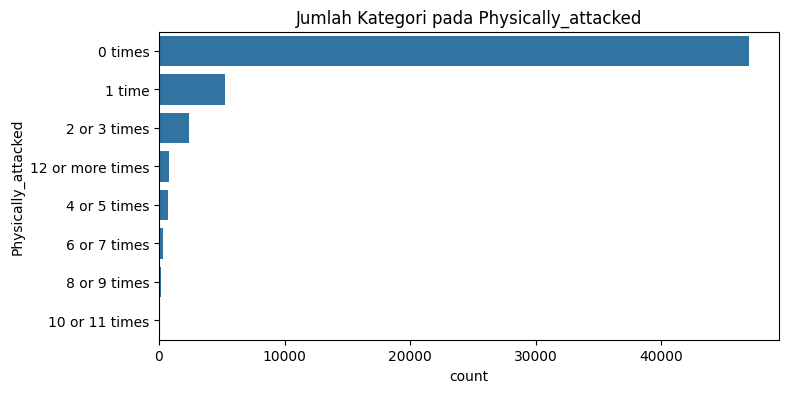

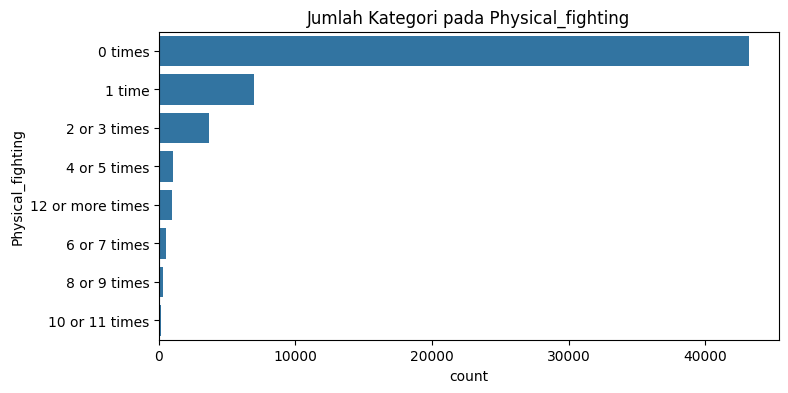

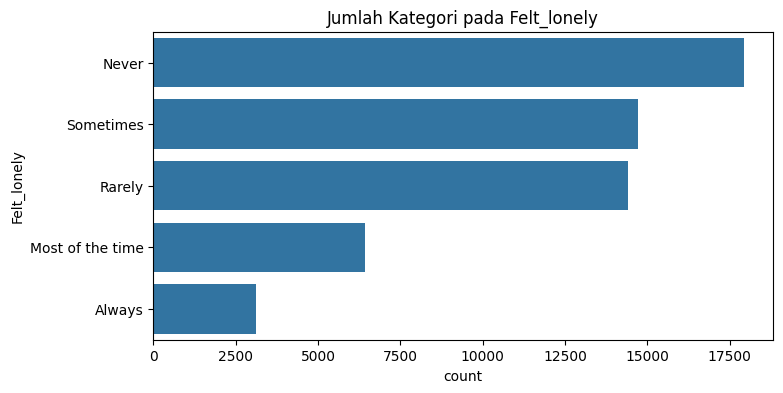

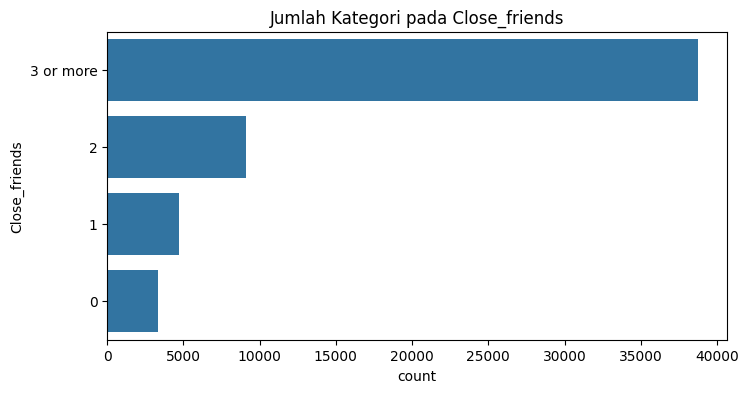

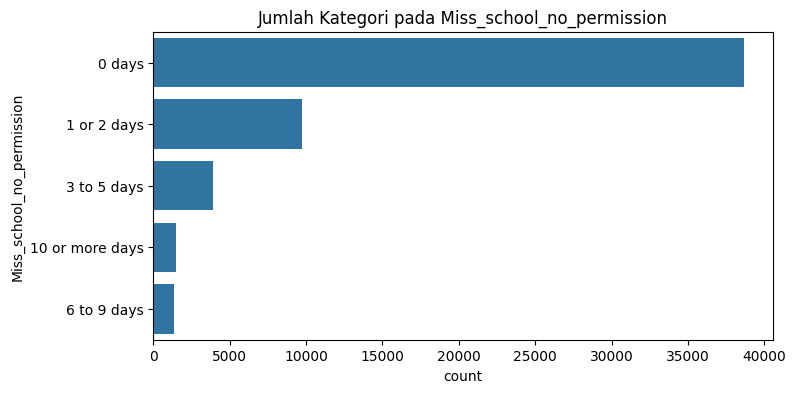

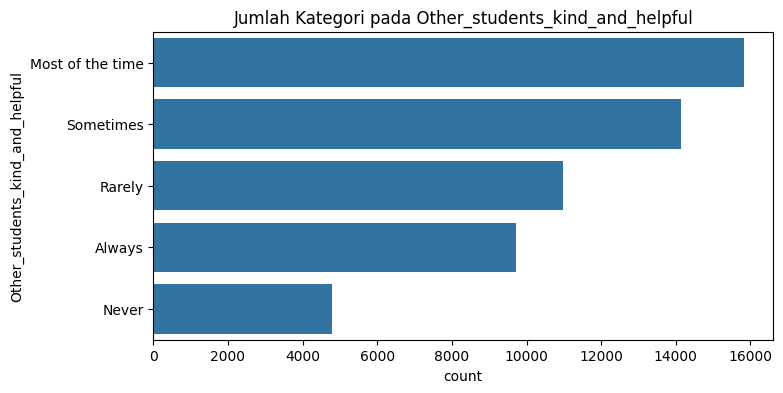

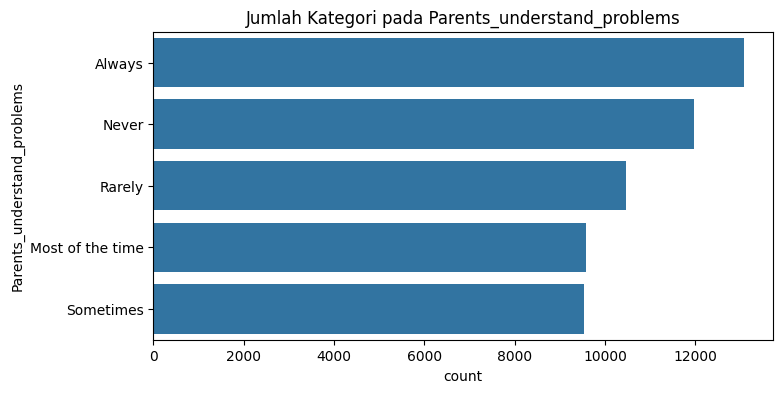

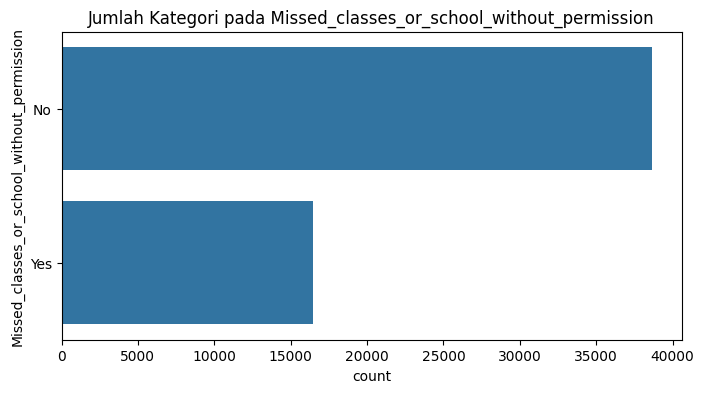

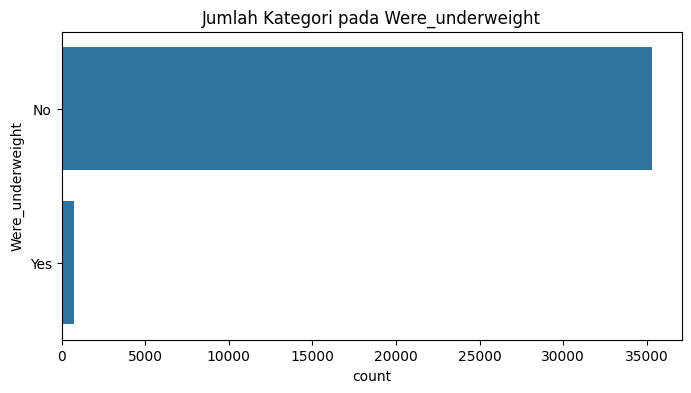

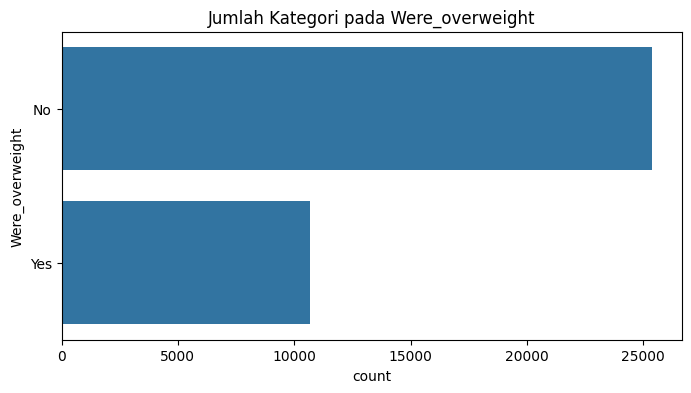

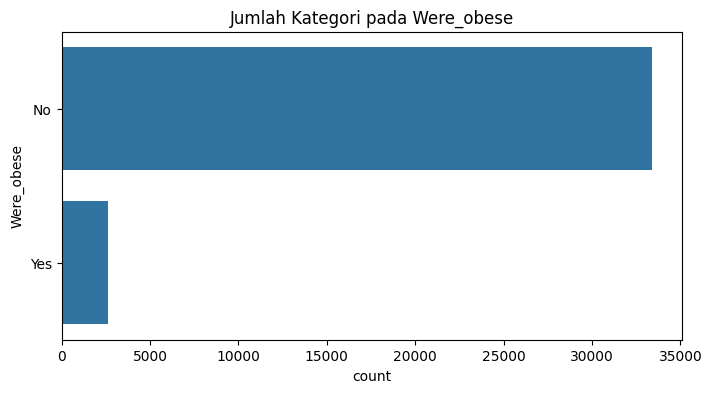

In [ ]:
categorical_variables = data.select_dtypes(include=["object"])
for col in categorical_variables.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Jumlah Kategori pada {col}')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## 1. Data hilang

In [ ]:
data.dropna(inplace=True)

## 2. Duplicates

In [ ]:
print('Jumlah duplicate:', data.duplicated().sum())
data = data.drop_duplicates()
print('Jumlah duplicate terbaru:', data.duplicated().sum())

Jumlah duplicate: 15114
Jumlah duplicate terbaru: 0


## 2. Outliers

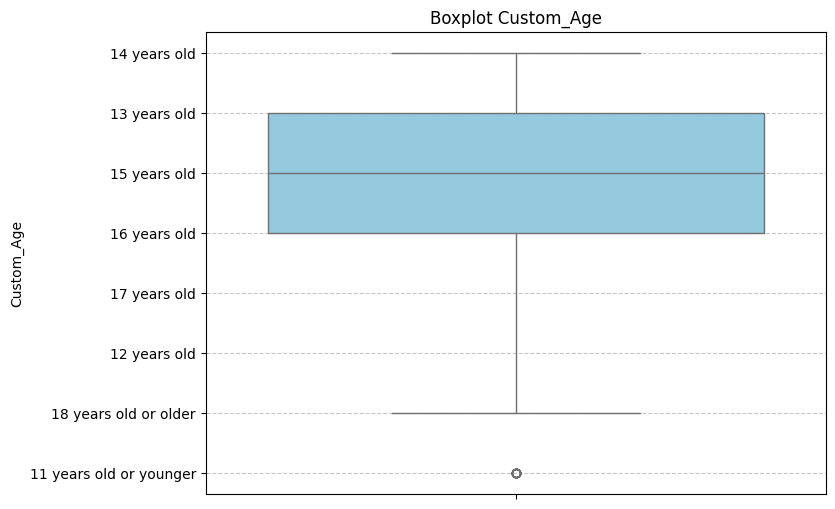

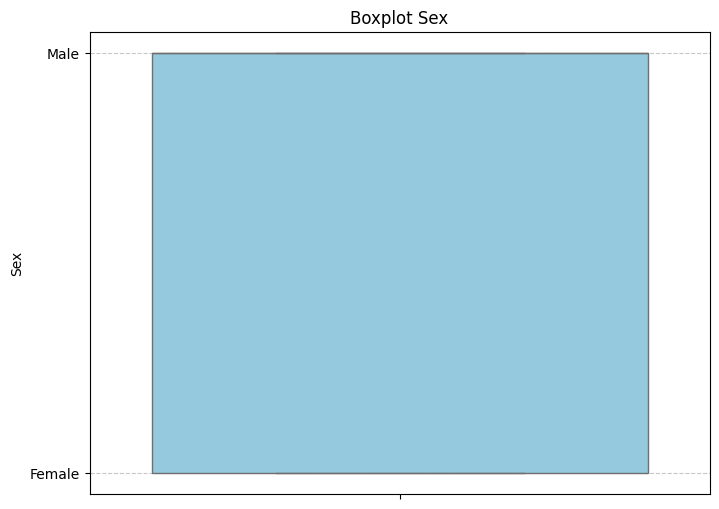

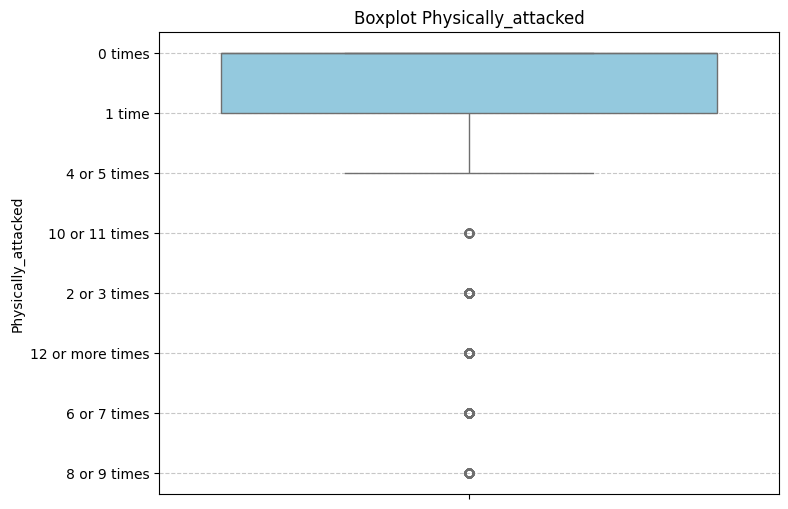

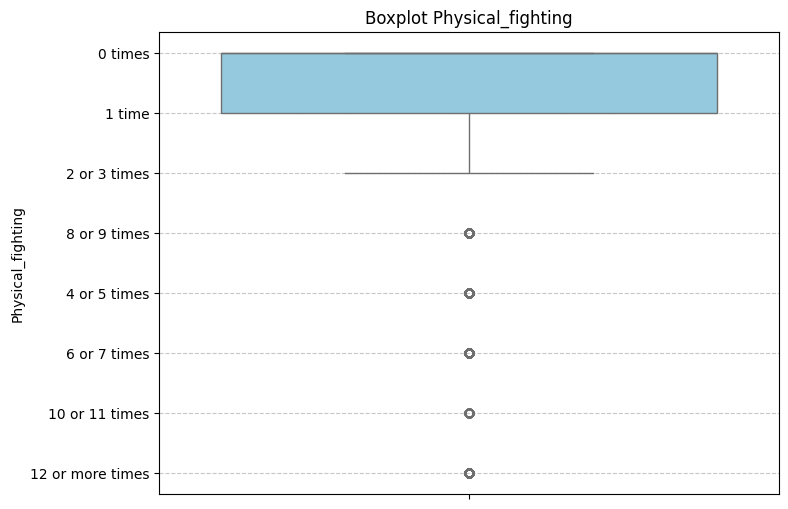

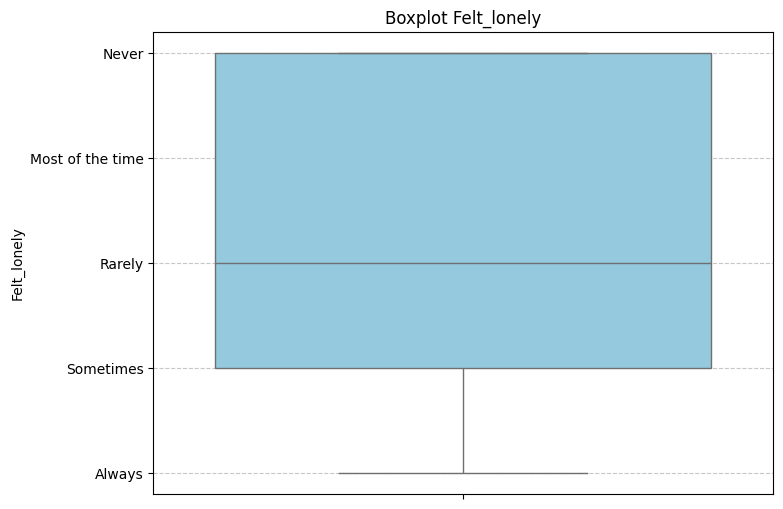

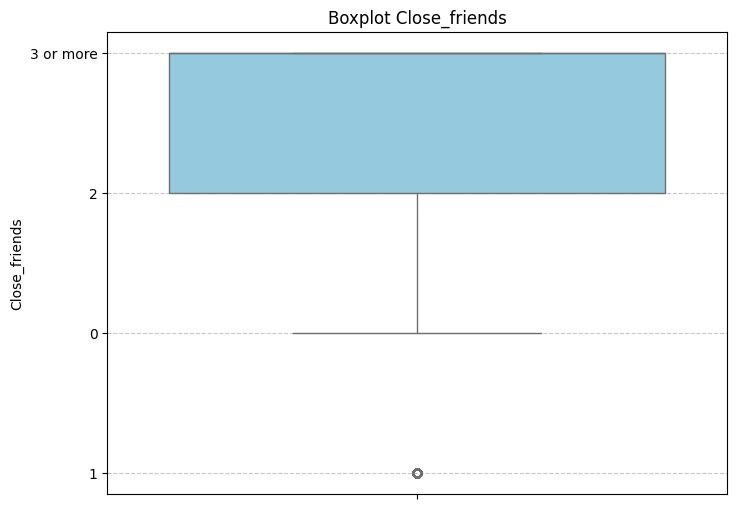

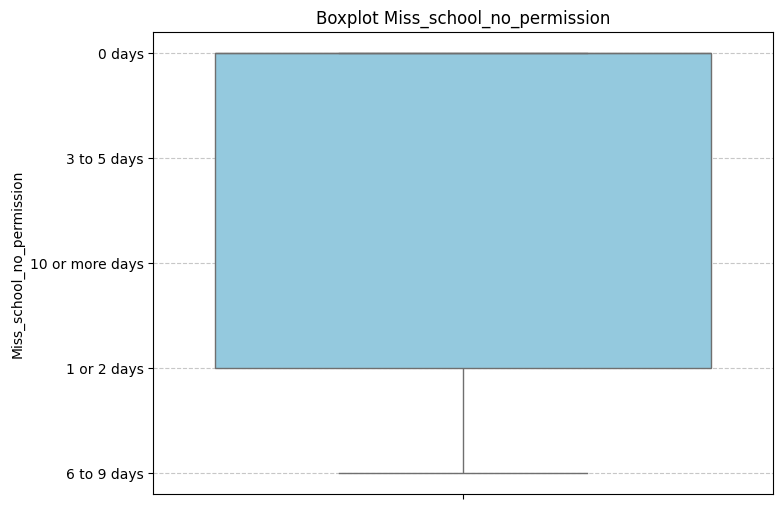

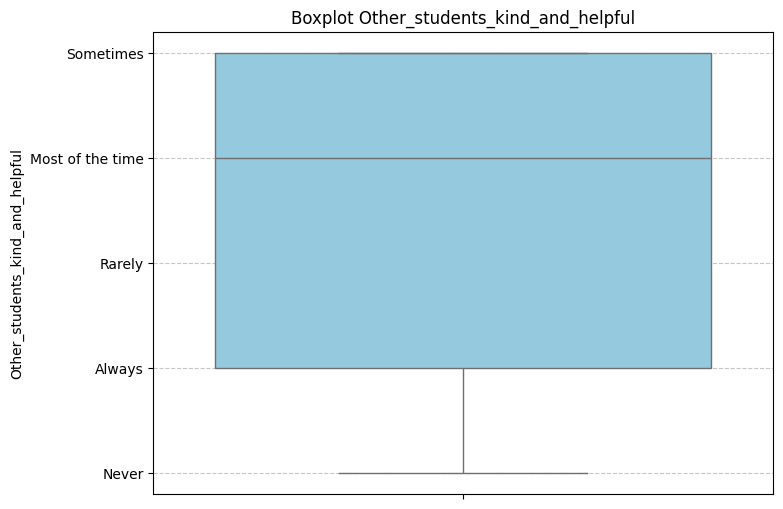

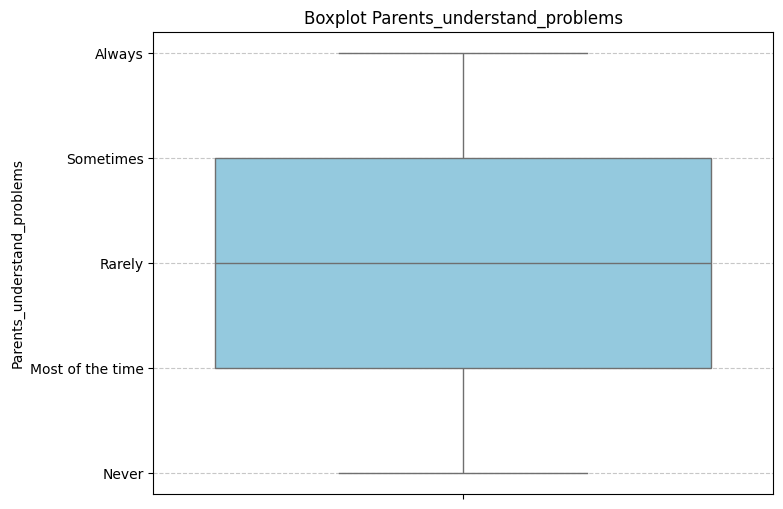

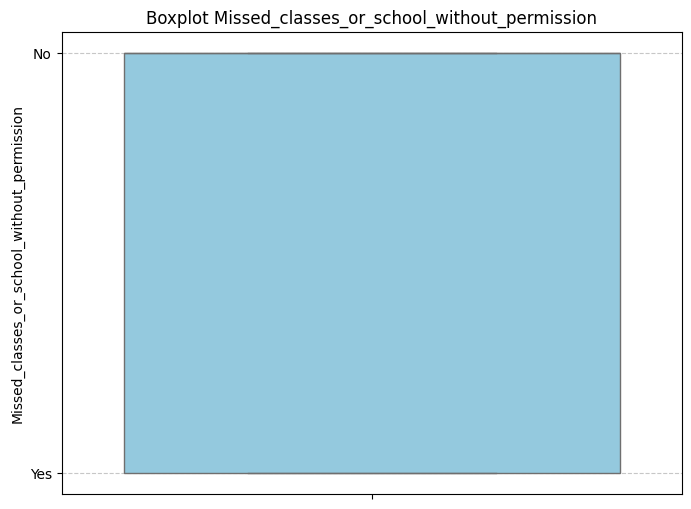

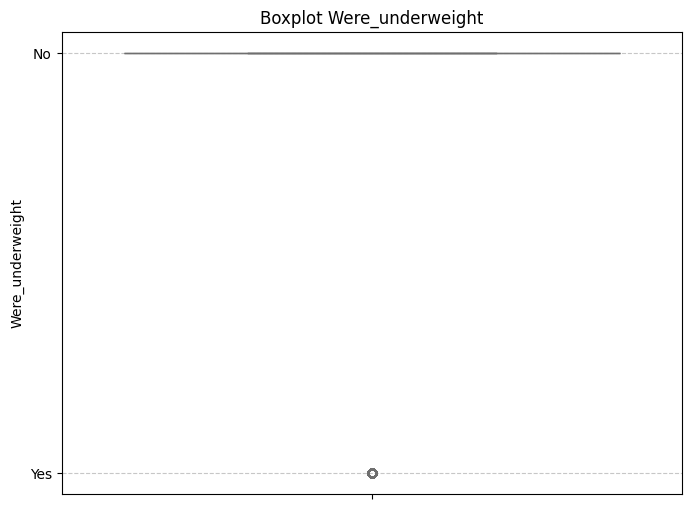

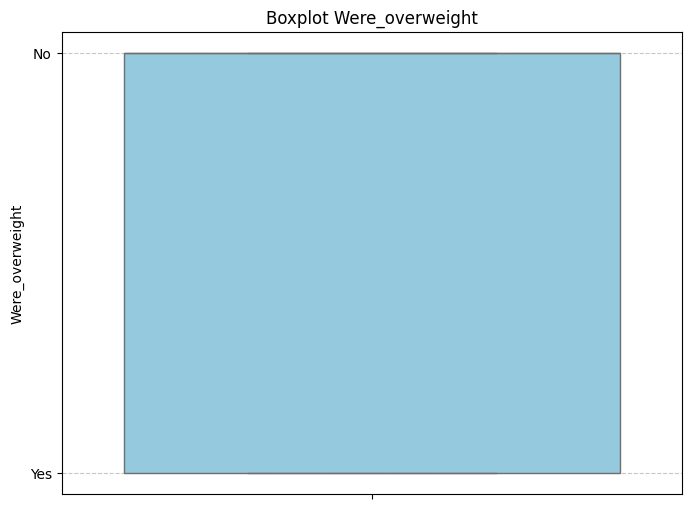

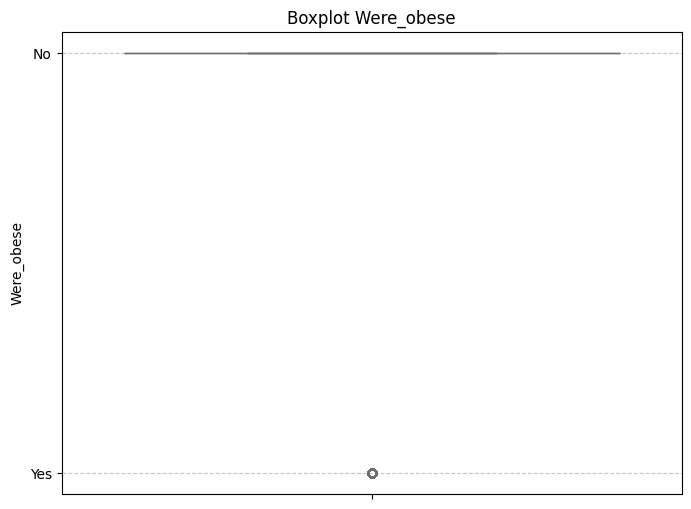

In [ ]:
for col in data:
  plt.figure(figsize=(8,6))
  sns.boxplot(y=data[col], color='skyblue')
  plt.title(f'Boxplot {col}')
  plt.ylabel(col)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()

## 3. Encoding

- Membuat fitur baru: Body condition

In [ ]:
def cat_body(row):
    if row['Were_overweight'] == 'Yes' and row['Were_obese'] == 'Yes':
        return 2
    elif row['Were_underweight'] == 'Yes' and (row['Were_overweight'] == 'Yes' or row['Were_obese'] == 'Yes'):
        return 2
    elif row['Were_overweight'] == 'Yes' or row['Were_obese'] == 'Yes':
        return 1
    elif row['Were_underweight'] == 'Yes':
        return 1
    else:
        return 0

data['Body_weight'] = data.apply(cat_body, axis=1)
data.drop(columns=['Were_underweight', 'Were_overweight', 'Were_obese'], inplace=True)
datacoded = data.copy()

- Labelling

In [ ]:
datacoded.head()

,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Missed_classes_or_school_without_permission,Body_weight
2,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,0
5,13 years old,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,No,0
10,15 years old,Male,0 times,1 time,Never,3 or more,3 to 5 days,Most of the time,Always,Yes,0
22,13 years old,Male,0 times,2 or 3 times,Most of the time,3 or more,0 days,Rarely,Always,No,0
23,14 years old,Male,0 times,2 or 3 times,Most of the time,2,0 days,Always,Sometimes,No,2


In [ ]:
for col in datacoded.drop(columns=['Custom_Age', 'Body_weight'], errors="ignore"):
  le = LabelEncoder()
  datacoded[col] = le.fit_transform(datacoded[col].astype(str))

datacoded.head()

,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Missed_classes_or_school_without_permission,Body_weight
2,14 years old,1,0,0,2,3,0,4,0,0,0
5,13 years old,1,0,1,2,3,0,1,0,0,0
10,15 years old,1,0,1,2,3,3,1,0,1,0
22,13 years old,1,0,4,1,3,0,3,0,0,0
23,14 years old,1,0,4,1,2,0,0,4,0,2


- Membuat fitur Customer_Age menjadi numerik

In [ ]:
datacoded['Custom_Age'] = datacoded['Custom_Age'].astype(str)  # Pastikan menjadi string
datacoded['Custom_Age'] = datacoded['Custom_Age'].str.extract(r'(\d+)')  # Ekstrak angka
datacoded['Custom_Age'] = pd.to_numeric(datacoded['Custom_Age'], errors='coerce')

## 4. Normalisasi

In [ ]:
scaler = RobustScaler()
data_norm = scaler.fit_transform(datacoded)

In [ ]:
data_scaled = pd.DataFrame(data_norm, columns=data.columns)
data_scaled.info()
data_scaled.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18496 entries, 0 to 18495
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Custom_Age                                   18496 non-null  float64
 1   Sex                                          18496 non-null  float64
 2   Physically_attacked                          18496 non-null  float64
 3   Physical_fighting                            18496 non-null  float64
 4   Felt_lonely                                  18496 non-null  float64
 5   Close_friends                                18496 non-null  float64
 6   Miss_school_no_permission                    18496 non-null  float64
 7   Other_students_kind_and_helpful              18496 non-null  float64
 8   Parents_understand_problems                  18496 non-null  float64
 9   Missed_classes_or_school_without_permission  18496 non-null  float64
 10

,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Missed_classes_or_school_without_permission,Body_weight
0,-0.5,0.0,0.0,0.0,-0.5,0.0,0.0,0.666667,-1.0,0.0,0.0
1,-1.0,0.0,0.0,1.0,-0.5,0.0,0.0,-0.333333,-1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,-0.5,0.0,3.0,-0.333333,-1.0,1.0,0.0
3,-1.0,0.0,0.0,4.0,-1.0,0.0,0.0,0.333333,-1.0,0.0,0.0
4,-0.5,0.0,0.0,4.0,-1.0,-1.0,0.0,-0.666667,1.0,0.0,2.0


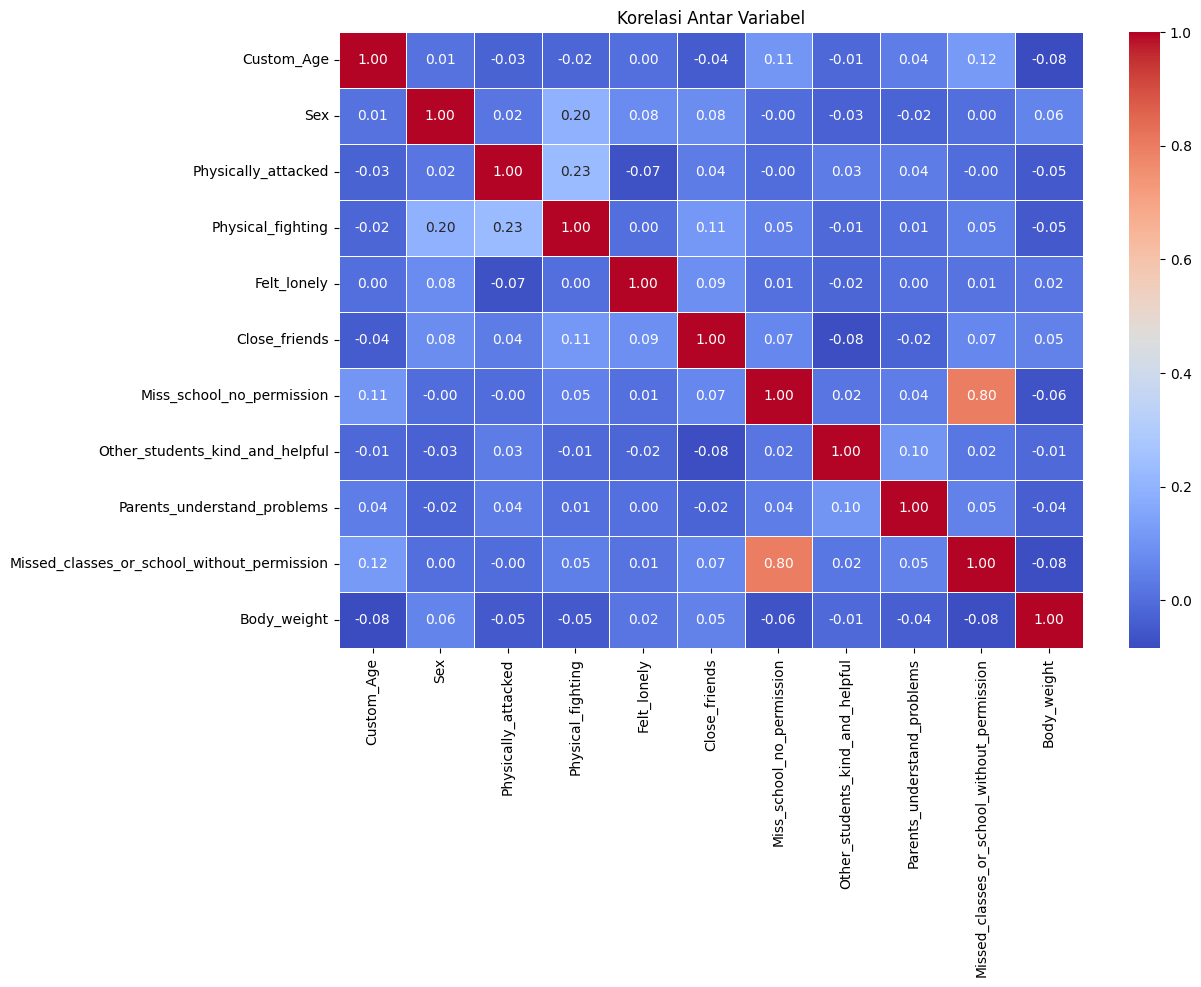

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Variabel')
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
pca = PCA(n_components=2)
fitur_pca = pca.fit_transform(data_scaled)

# Konversi ke DataFrame
fitur_pca_df = pd.DataFrame(fitur_pca, columns=[f'PC{i+1}' for i in range(2)])
print(fitur_pca_df.head())

        PC1       PC2
0 -1.134248 -0.059161
1 -0.267078 -0.536791
2 -0.097039 -1.092163
3  2.324283 -1.918700
4  2.195184 -1.858528


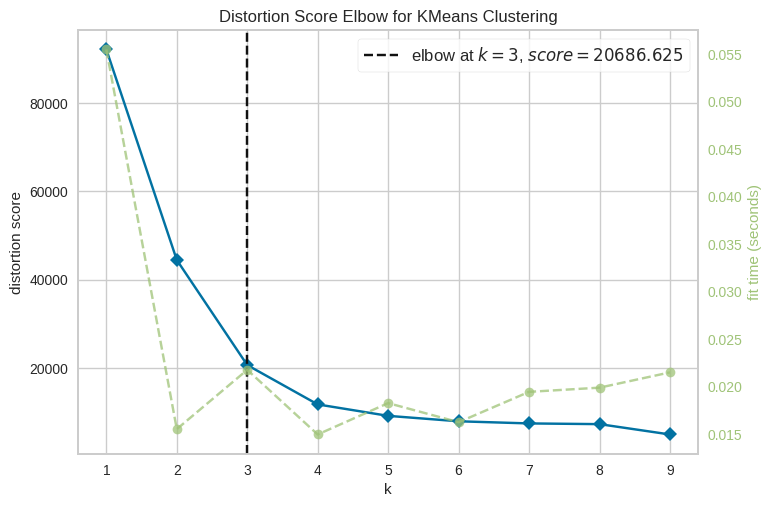

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(fitur_pca_df)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [ ]:
# Gunakan K berdasarkan Elbow Method
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(fitur_pca_df)

# Tambahkan hasil klaster ke dalam dataset
data['Cluster'] = clusters
data_scaled['Cluster'] = clusters
datacoded['Cluster'] = clusters
print(data.head())  # Cek hasil clustering

      Custom_Age   Sex Physically_attacked Physical_fighting  \
2   14 years old  Male             0 times           0 times   
5   13 years old  Male             0 times            1 time   
10  15 years old  Male             0 times            1 time   
22  13 years old  Male             0 times      2 or 3 times   
23  14 years old  Male             0 times      2 or 3 times   

         Felt_lonely Close_friends Miss_school_no_permission  \
2              Never     3 or more                    0 days   
5              Never     3 or more                    0 days   
10             Never     3 or more               3 to 5 days   
22  Most of the time     3 or more                    0 days   
23  Most of the time             2                    0 days   

   Other_students_kind_and_helpful Parents_understand_problems  \
2                        Sometimes                      Always   
5                 Most of the time                      Always   
10                Most of the ti

In [ ]:
drive.mount('/content/drive')

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
score = silhouette_score(fitur_pca_df, clusters)
print('Silhouette Score:', score)

Silhouette Score: 0.7425759941219092


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

- Fitur dengan variance TIDAK mendekati 0:

In [ ]:
selector = VarianceThreshold(threshold=0.02)
data_selected = selector.fit_transform(data_scaled)

selected_features = data_scaled.columns[selector.get_support()]
print("Fitur Terpilih:", selected_features)

Fitur Terpilih: Index(['Custom_Age', 'Sex', 'Physically_attacked', 'Physical_fighting',
       'Felt_lonely', 'Close_friends', 'Miss_school_no_permission',
       'Other_students_kind_and_helpful', 'Parents_understand_problems',
       'Missed_classes_or_school_without_permission', 'Body_weight'],
      dtype='object')


Hasil: tidak ada fitur yg terbuang

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

<ipython-input-29-4934df549864>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=plt.cm.viridis(cluster / max(unique_clusters)), label=f'Cluster {cluster}')


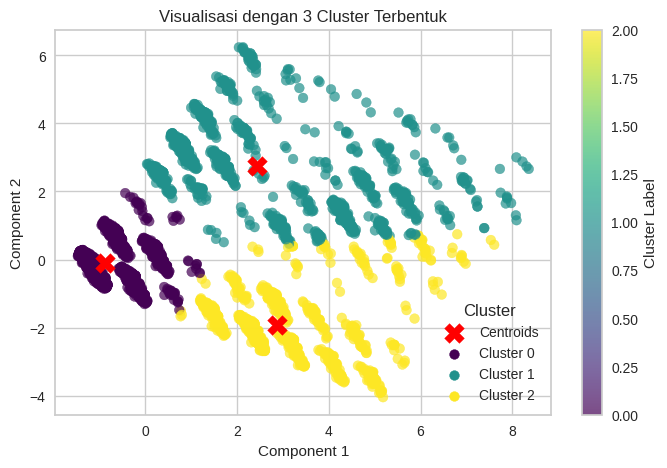

In [ ]:
fitur_pca_df = np.array(fitur_pca_df)


plt.figure(figsize=(8, 5))
scatter = plt.scatter(fitur_pca_df[:, 0], fitur_pca_df[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
unique_clusters = np.unique(clusters)

for cluster in unique_clusters:
    plt.scatter([], [], c=plt.cm.viridis(cluster / max(unique_clusters)), label=f'Cluster {cluster}')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Visualisasi dengan 3 Cluster Terbentuk')
plt.legend(title="Cluster")
plt.colorbar(scatter, label="Cluster Label")
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [ ]:
data['Cluster'] = clusters
data_cluster = data.copy()
data_cluster.head()


,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Missed_classes_or_school_without_permission,Body_weight,Cluster
2,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,0,0
5,13 years old,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,No,0,0
10,15 years old,Male,0 times,1 time,Never,3 or more,3 to 5 days,Most of the time,Always,Yes,0,0
22,13 years old,Male,0 times,2 or 3 times,Most of the time,3 or more,0 days,Rarely,Always,No,0,2
23,14 years old,Male,0 times,2 or 3 times,Most of the time,2,0 days,Always,Sometimes,No,2,2


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
n_cluster = pd.Series(clusters).value_counts().sort_index()

print('Banyaknya elemen tiap cluster:\n', n_cluster)

Banyaknya elemen tiap cluster:
 0    10970
1     1757
2     1906
Name: count, dtype: int64


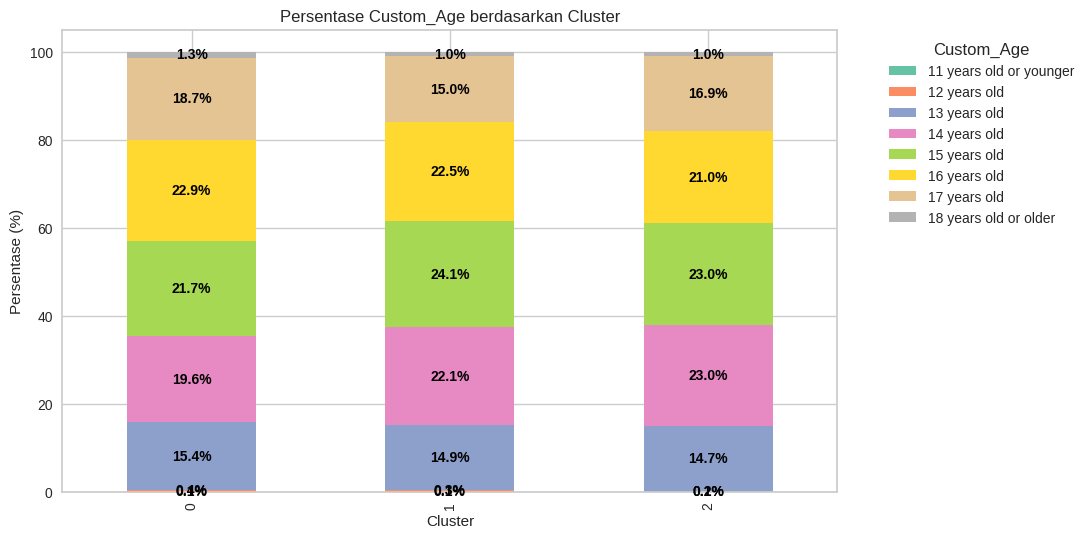

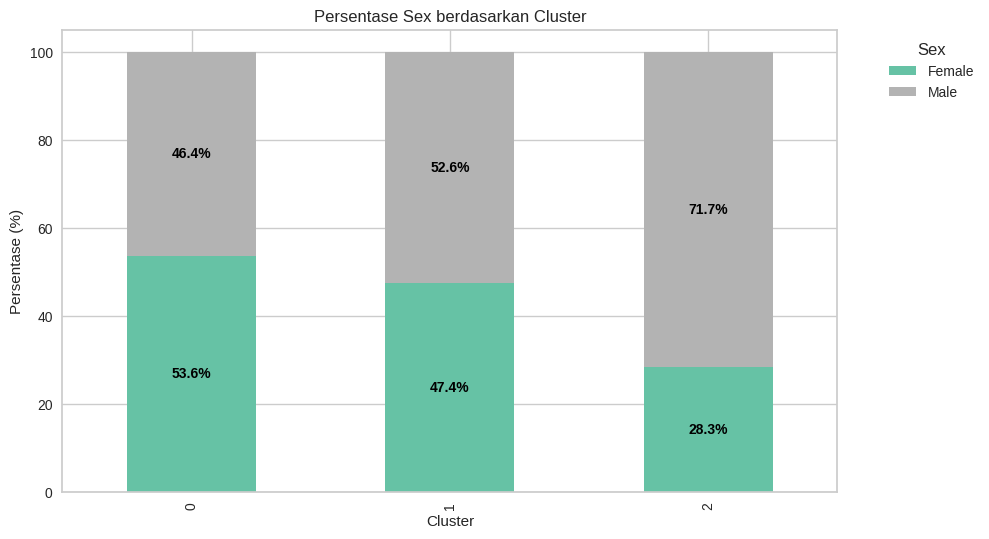

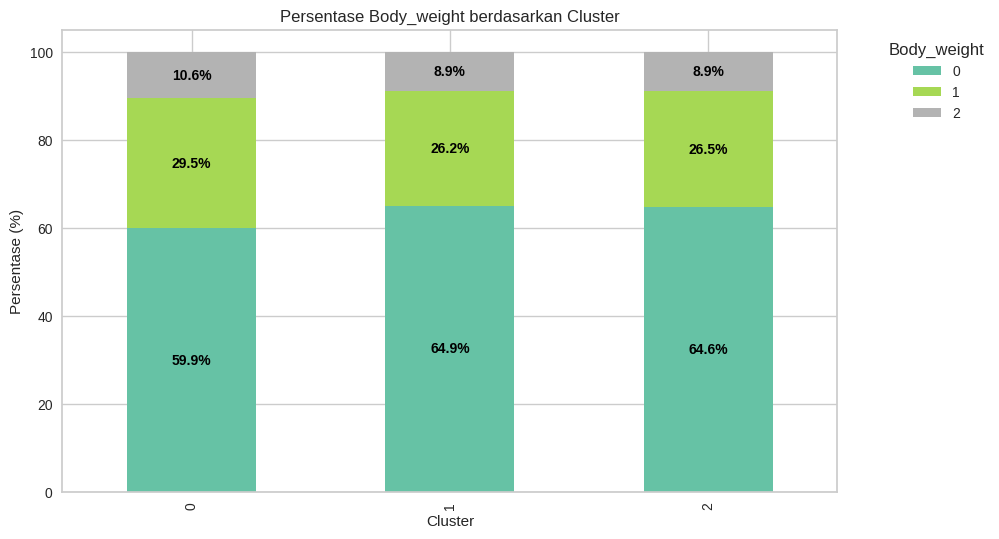

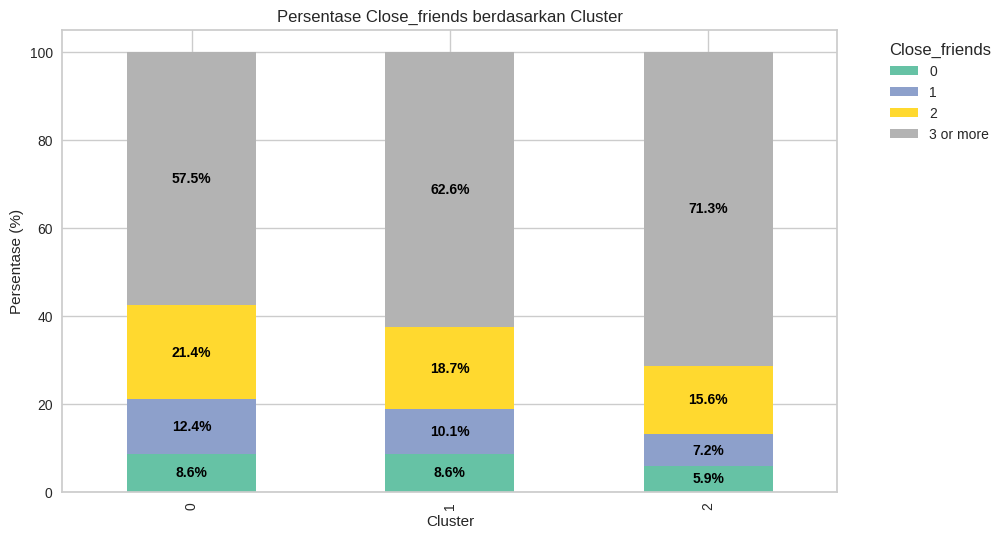

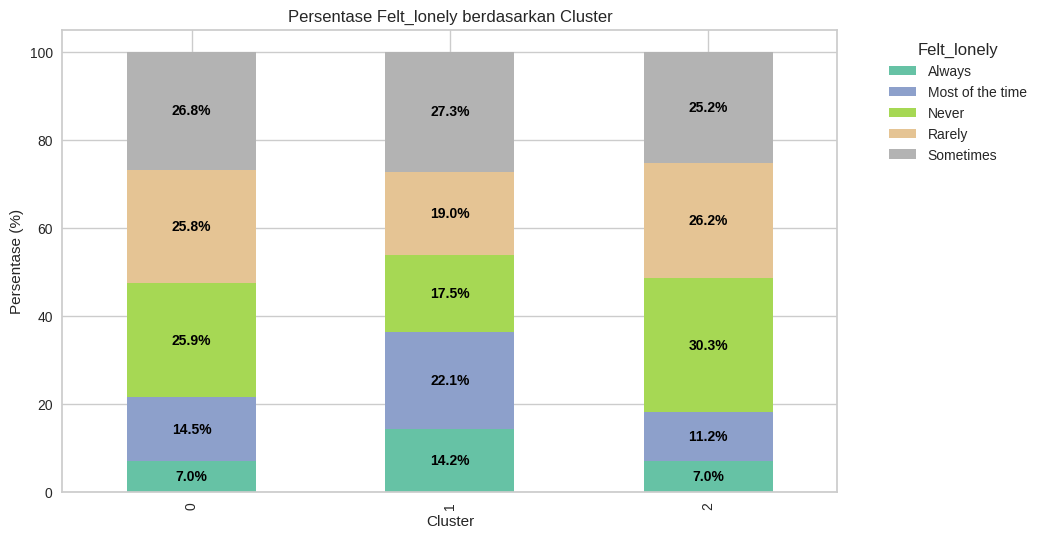

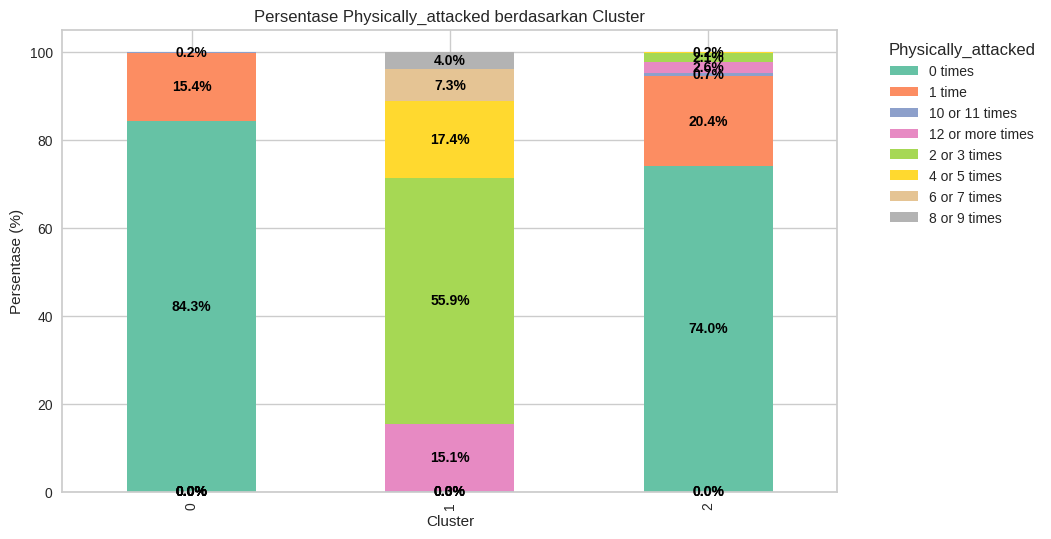

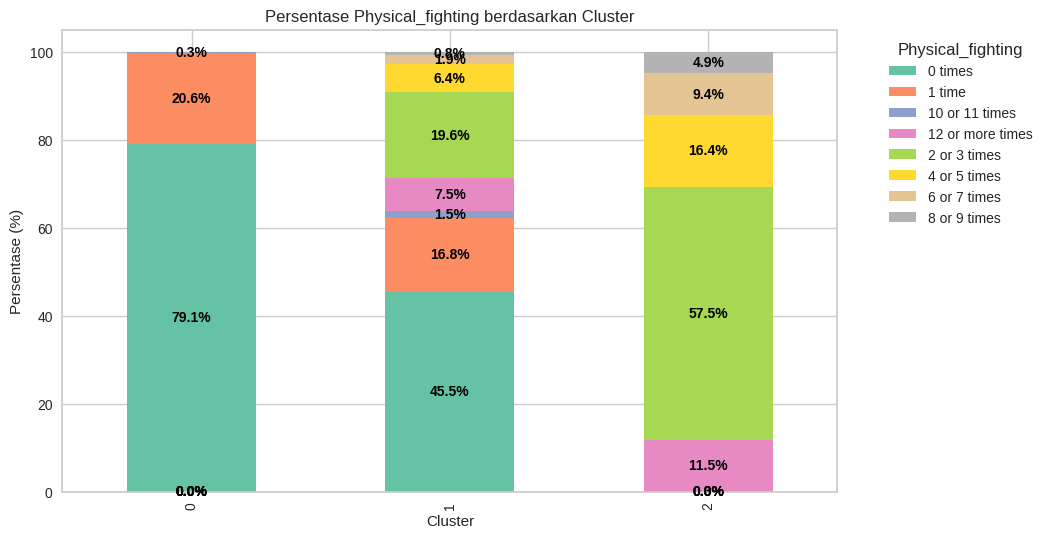

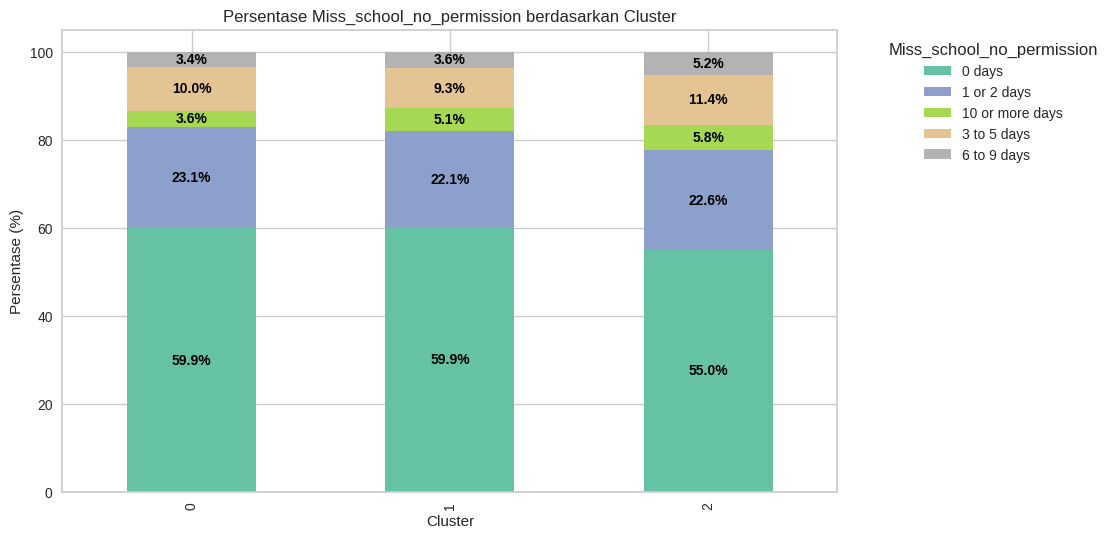

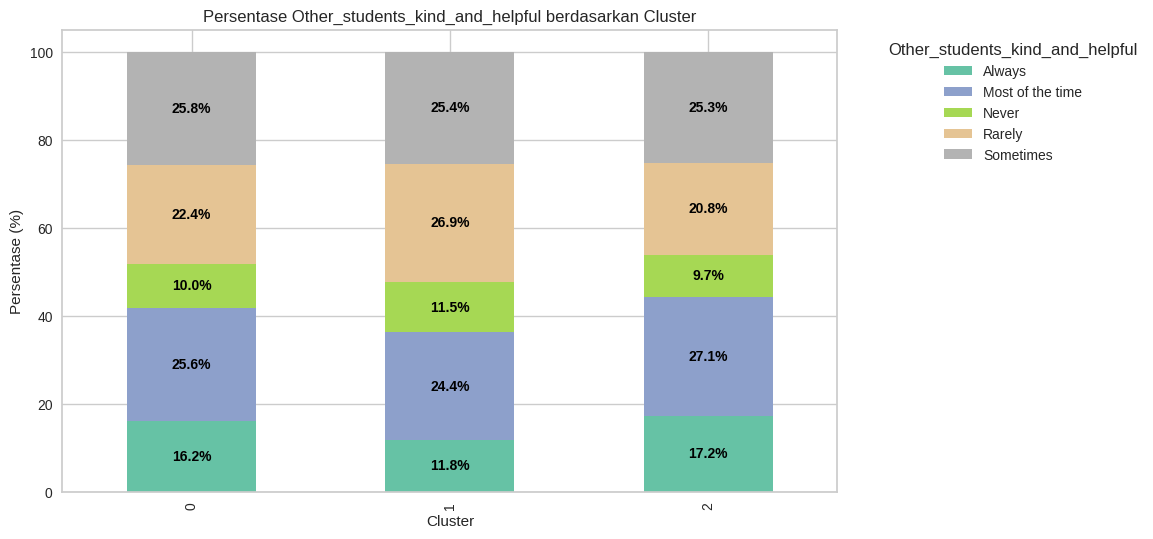

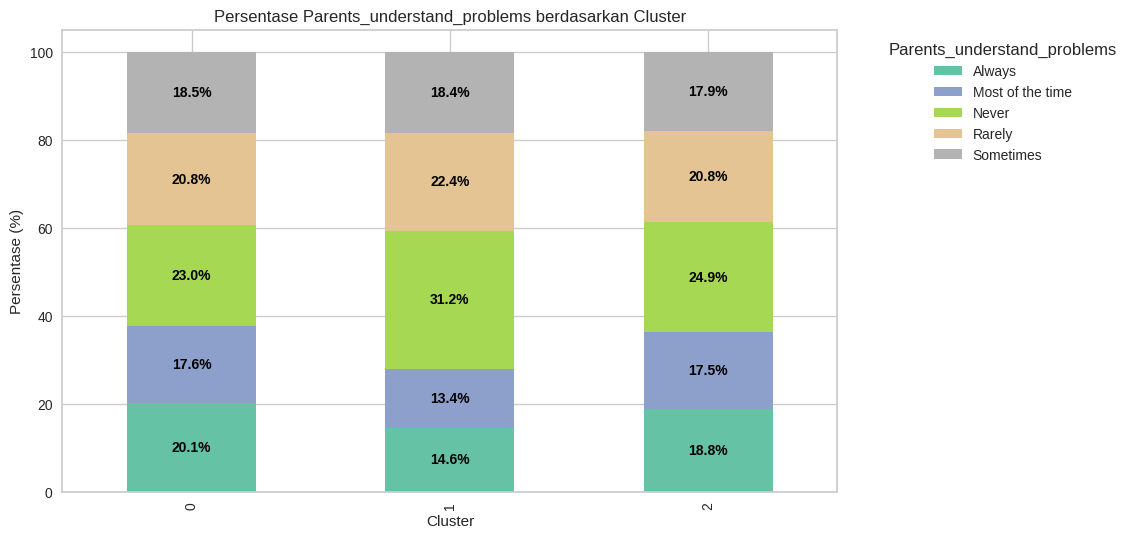

In [ ]:
fitur = ['Custom_Age', 'Sex', 'Body_weight', 'Close_friends', 'Felt_lonely',
         'Physically_attacked',  'Physical_fighting', 'Miss_school_no_permission',
         'Other_students_kind_and_helpful', 'Parents_understand_problems']

for col in fitur:
    plt.figure(figsize=(10, 6))

    feature_percentage = data_cluster.groupby('Cluster')[col].value_counts(normalize=True).unstack() * 100

    ax = feature_percentage.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())

    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='black', weight='bold')

    plt.title(f'Persentase {col} berdasarkan Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Persentase (%)')
    plt.legend(title=col, loc='upper left', bbox_to_anchor=(1.05, 1), framealpha=0.5)
    plt.show()

Tulis hasil interpretasinya di sini.
1. Cluster 0:
- Custom_Age: Mayoritas 16 years old (22,9%).
- Sex: Female unggul 50,9%
- Body weight: terbanyak dengan proporsi tubuh normal ('0') sebanyak 59,9%.
- Close friends: 57,5% memiliki lebih dari 3 teman dekat (indikator sosialisasi baik).
- Felt lonely: 26,8% memilih "Sometimes".
- Physical fighting: Mayoritas 0 times (79,1%), tetapi 17.7% pernah 2 or 3 times.
- Miss_school_no_permission: 59,9% tidak pernah bolos.
- Parents_understand_problems: 23,0% merasa orang tua "Never" memahami masalah mereka.
- **Analisis:** Cluster ini didominasi remaja usia 16 tahun dengan memiliki close_friends yg cukup banyak, meskipun terkadang felt_lonely. Selain itu tingkat perkelahian sangat rendah, meskipun Orang tua relatif tidak pernah memahami (parents_understand_problems).
- **Kesimpulan:** Cluster yang aman damai jauh dari faktor yg berhubungan dengan bullying.
- **Rekomendasi:** Konseling untuk mengatasi felt_lonely, sosialisasi mengenai peran ortu dalam pencegahan dan penanganan bullying.

2. Cluster 1:
- Physically_attacked: 55,9% 2 or 3 times.
- Miss_school_no_permission: 55,0% tidak pernah bolos.
- Parents_understand_problems: 31,2% merasa orang tua "Never" memahami masalah mereka.
- **Analisis:** Cluster didominasi oleh siswa yang memiliki kehidupan yg paling jauh dari faktor yg berhubungan dg bullying di antara cluster lainnya.
- **Kesimpulan:** Cluster yang erat terhadap faktor yg berhubungan dengan bullying
- **Rekomendasi:** Program anti-bullying (fisik & cyber), fokus pada masalah sosial siswa untuk mencegah perkelahian dan konseling orang tua lebih kuat.


3. Cluster 2:
- Close friends: 71,3% memiliki lebih dr 3 teman dekat (paling tinggi).
- Miss_school_no_permission: 50,4% tidak pernah skip sekolah.
- Body weight: terbanyak dengan proporsi tubuh normal ('0') sebanyak 64,6%.
-Physical attacked: 20,4% 1 time

- **Analisis:** Cluster diduduki oleh siswa yg tergolong di mempunyai kehidupan yg cukup jauh dr faktor yg berhubungan dg bullying.
- **Kesimpulan:** Cluster yang tergolong aman damai jauh dari faktor yg berhubungan dengan bullying.
- **Rekomendasi:** Lebih memperhatikan siswa yang masih berkelahi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
datacoded.to_csv('bullying_clusters2.csv', index=False)
files.download('bullying_clusters2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>